In [1]:
import os, sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec

cwd = os.getcwd()
model_path = os.path.abspath(os.path.join(cwd, os.pardir, 'models'))
sys.path.append(model_path)
from conference_model import *

In [2]:
df = pd.read_csv('../data/SFHH_ConferenceNetwork.dat', delim_whitespace=True, header=None, names=['Timestamp', 'ID1', 'ID2'])

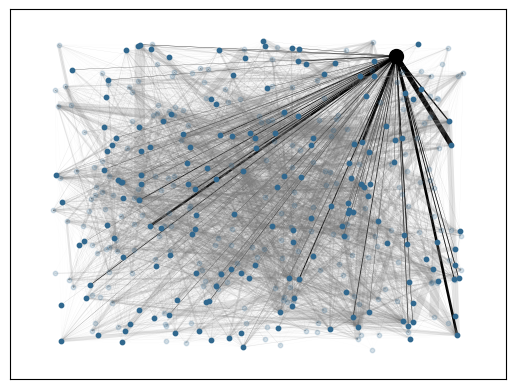

In [3]:
# Count the frequency of interactions
interaction_counts = df.groupby(['ID1', 'ID2']).size().reset_index(name='weight')

# Create a graph
G = nx.Graph()

# Add weighted edges from the dataframe
for idx, row in interaction_counts.iterrows():
    G.add_edge(row['ID1'], row['ID2'], weight=row['weight'])

# Identify the node with the highest degree
max_degree_node = max(G.nodes, key=G.degree)

# Initialize all nodes and edges with low opacity and default colors
node_alpha = {node: 0.2 for node in G.nodes}
node_size = {node: 10 for node in G.nodes}  # Default small size for all nodes
node_color = {node: '#31688e' for node in G.nodes}  # Default color for all nodes

# Black color for edges connected to the highest degree node, grey for others
edge_color = {edge: 'grey' if max_degree_node not in edge else 'black' for edge in G.edges()}

# Set the highest degree node to be opaque, black, and larger
node_alpha[max_degree_node] = 1
node_size[max_degree_node] = 100  # Larger size for the most connected node
node_color[max_degree_node] = 'black'  # Black color for the most connected node

# All neighbors of the max_degree_node should be opaque
for neighbor in G.neighbors(max_degree_node):
    node_alpha[neighbor] = 1

# Draw the network with varied transparency and node properties
pos = nx.random_layout(G)  # positions for all nodes

# Draw all nodes with varying alpha, size, and color
for node in G.nodes():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_color[node], alpha=node_alpha[node], node_size=node_size[node])

# Extract edge weights and apply a scaling factor to the edge thickness
scaling_factor = 0.02  # Adjust this value as needed
weights = [G[u][v]['weight'] * scaling_factor for u, v in G.edges()]

# Draw all edges with the specified colors and default alpha
for (u, v), color in edge_color.items():
    weight = G[u][v]['weight'] * scaling_factor
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=weight, alpha=1 if color == 'black' else 0.2, edge_color=color)


# Define the directory path and the filename
directory = '../figures'
filename = 'figure4a.svg'

# Check if the directory exists
if not os.path.exists(directory):
    # If the directory does not exist, create it
    os.makedirs(directory)

# Save the figure
plt.savefig(os.path.join(directory, filename), bbox_inches='tight')
plt.show()

<Figure size 800x350 with 0 Axes>

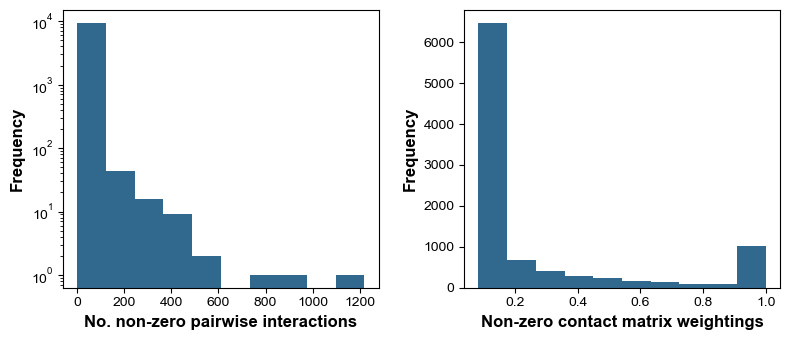

In [4]:
# Your existing code for interaction counts
sorted_df = pd.DataFrame(np.sort(df[['ID1', 'ID2']], axis=1), columns=['ID1', 'ID2'])
interaction_counts = sorted_df.groupby(['ID1', 'ID2']).size()

# Your existing code for upper triangular non-zero values
Tadj = weighted_contact_matrix(df, 90)
upper_tri = scipy.sparse.triu(Tadj, k=1)
non_zero_values = upper_tri.data

# Set up subplots; ax1 will be replaced by brokenaxes
fig = plt.figure(figsize=(8, 3.5))
gs = GridSpec(1, 2, figure=fig)
plt.rcParams['font.family'] = 'Arial'

# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.5))
plt.rcParams['font.family'] = 'Arial'

# Plot the histogram of interaction counts
ax1.hist(interaction_counts, bins=10, color='#31688e')
ax1.set_xlabel('No. non-zero pairwise interactions', weight='bold', fontsize=12)
ax1.set_ylabel('Frequency', weight='bold', fontsize=12)
ax1.set_yscale('log')
ax1.grid(False)

# Plot the histogram of the non-zero values from the upper triangular matrix
ax2.hist(non_zero_values, bins=10, color='#31688e')
ax2.set_xlabel('Non-zero contact matrix weightings', weight='bold', fontsize=12)
ax2.set_ylabel('Frequency', weight='bold', fontsize=12)
ax2.grid(False)
plt.tight_layout()  # Adjust subplots to fit in the figure area.

# Define the directory path and the filename
directory = '../figures'
filename = 'figure4b-c.svg'

# Check if the directory exists
if not os.path.exists(directory):
    # If the directory does not exist, create it
    os.makedirs(directory)

# Save the figure
plt.savefig(os.path.join(directory, filename), bbox_inches='tight')
plt.show()
